In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
data = pd.read_csv("twitter.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0      3.0      2   
1           1      3            0                   3      0.0      1   
2           2      3            0                   3      0.0      1   
3           3      3            0                   2      1.0      1   
4           4      6            0                   6      0.0      1   

                                               tweet  valger_speech  
0  !!! RT @mayasolovely: As a woman you shouldn't...              0  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...              0  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...              0  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...              0  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...              0  


In [3]:
data["labels"] = data["class"].map({0: "valger_speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0      3.0      2   
1           1      3            0                   3      0.0      1   
2           2      3            0                   3      0.0      1   
3           3      3            0                   2      1.0      1   
4           4      6            0                   6      0.0      1   

                                               tweet  valger_speech  \
0  !!! RT @mayasolovely: As a woman you shouldn't...              0   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...              0   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...              0   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...              0   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...              0   

                  labels  
0  No Hate and Offensive  
1     Offensive Language  
2     Offensive Language  
3     Offensive Language  

In [4]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [6]:
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = cv.fit_transform(data["tweet"])
y = data["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
sample = "I kill you"
data = cv.transform([clean(sample)]).toarray()
print(knn.predict(data))

['valger_speech']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

data = pd.read_csv("twitter.csv")
data["labels"] = data["class"].map({0: "valger_speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
print(data.head())

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["tweet"] = data["tweet"].apply(clean)

x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

k = 5 # number of neighbors to consider
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train,y_train)

sample = "Let's unite and kill all the people who are protesting against the government"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0      3.0      2   
1           1      3            0                   3      0.0      1   
2           2      3            0                   3      0.0      1   
3           3      3            0                   2      1.0      1   
4           4      6            0                   6      0.0      1   

                                               tweet  valger_speech  \
0  !!! RT @mayasolovely: As a woman you shouldn't...              0   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...              0   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...              0   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...              0   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...              0   

                  labels  
0  No Hate and Offensive  
1     Offensive Language  
2     Offensive Language  
3     Offensive Language  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [9]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(confusion)

Accuracy: 85.00%
Confusion Matrix:
[[ 989  404   13]
 [ 325 5839  161]
 [  66  258  124]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


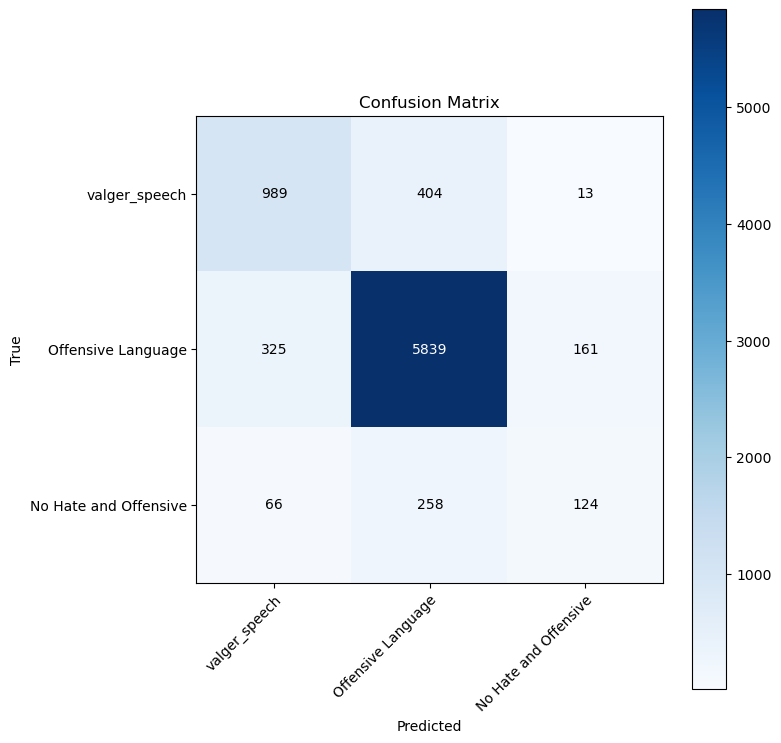

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

labels = ['valger_speech', 'Offensive Language', 'No Hate and Offensive']

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mat.shape[1]),
       yticks=np.arange(conf_mat.shape[0]),
       xticklabels=labels, yticklabels=labels,
       xlabel='Predicted',
       ylabel='True',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], fmt),
                ha="center", va="center",
                color="white" if conf_mat[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

# Load the data
data = pd.read_csv("twitter.csv")

# Map the class labels to text labels
data["labels"] = data["class"].map({0: "valger_speech", 1: "Offensive Language", 2: "No Hate and Offensive"})

# Define the cleaning function
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

# Apply the cleaning function to the "tweet" column
stopword=set(stopwords.words('english'))
data["tweet"] = data["tweet"].apply(clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["tweet"], data["labels"], test_size=0.2, random_state=42)

# Convert the text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a decision tree classifier and fit the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
score = clf.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 0.874924349404882


In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

# Load the data
data = pd.read_csv("twitter.csv")

# Map the class labels to text labels
data["labels"] = data["class"].map({0: "valger_speech", 1: "Offensive Language", 2: "No Hate and Offensive"})

# Define the cleaning function
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

# Apply the cleaning function to the "tweet" column
stopword=set(stopwords.words('english'))
data["tweet"] = data["tweet"].apply(clean)

# Convert the text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["tweet"])
y = data["labels"]

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the data
clf.fit(X, y)



DecisionTreeClassifier(random_state=42)

In [12]:
# Define some example tweets
new_tweets = ["I love my country", "You are so ugly", "We should kill all the immigrants"]

# Clean the example tweets
new_tweets_clean = [clean(tweet) for tweet in new_tweets]

# Convert the cleaned tweets into numerical data using the CountVectorizer
new_X = vectorizer.transform(new_tweets_clean)

# Use the trained classifier to make predictions on the new data
new_y = clf.predict(new_X)

# Print the predictions
print(new_y)


['No Hate and Offensive' 'No Hate and Offensive' 'valger_speech']


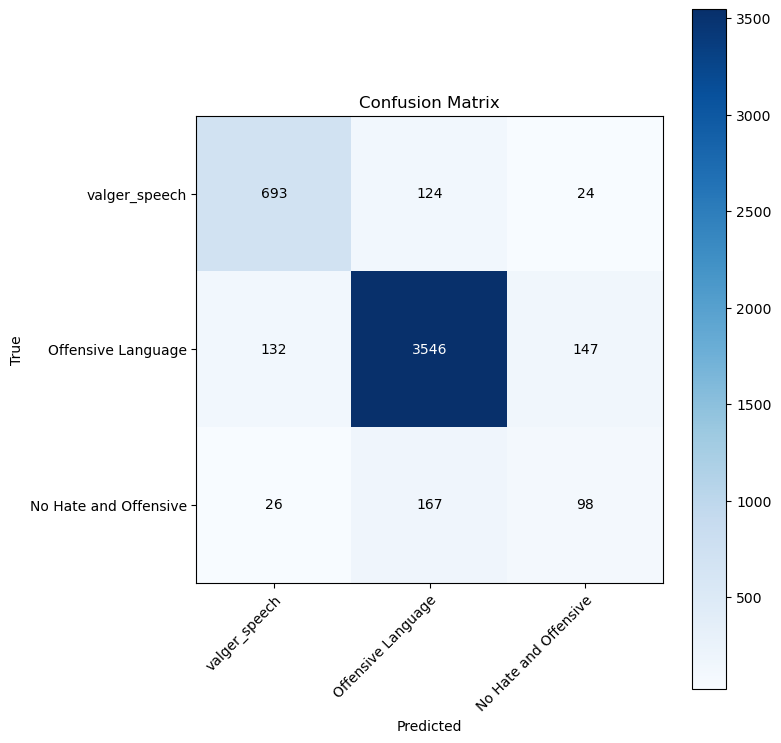

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

labels = ['valger_speech', 'Offensive Language', 'No Hate and Offensive']

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mat.shape[1]),
       yticks=np.arange(conf_mat.shape[0]),
       xticklabels=labels, yticklabels=labels,
       xlabel='Predicted',
       ylabel='True',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], fmt),
                ha="center", va="center",
                color="white" if conf_mat[i, j] > thresh else "black")

fig.tight_layout()
plt.show()